In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data = pd.read_csv("C:\\Benion\\Benion Programmings\\Python\\AI & ML\\data\\titanic_dataset.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
# Number of passengers in the original dataset
print(f"No of Passengers: {len(titanic_data.index)}")

No of Passengers: 418


# Analyzing Data

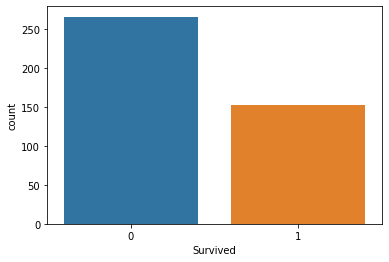

In [6]:
# Passengers who Survived VS Passengers who did not Survived
sns.countplot(x="Survived", data=titanic_data)

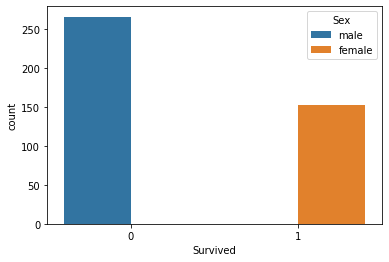

In [7]:
# Male Passengers VS Female Passengers
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

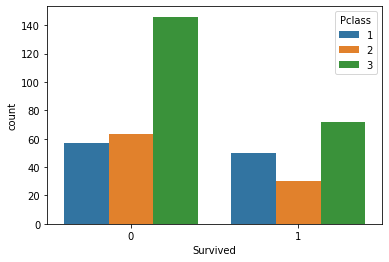

In [8]:
# The class the Passengers were travelling in
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

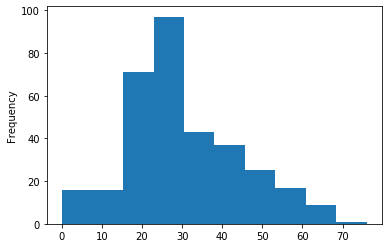

In [9]:
# The Age distribution of the Passengers
titanic_data["Age"].plot.hist()

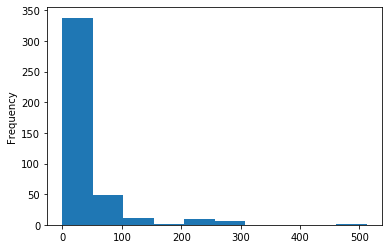

In [10]:
# The Fare of the Passengers
titanic_data["Fare"].plot.hist()

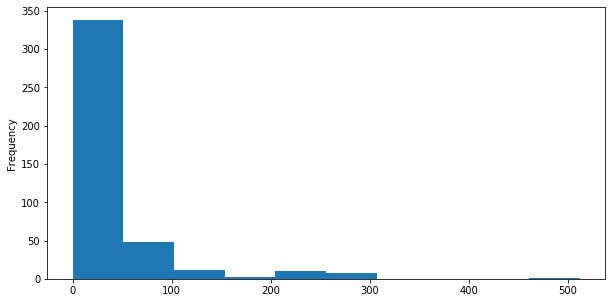

In [11]:
# The Fare of the Passengers
# titanic_data["Fare"].plot.hist(bin=20, figsize=(10, 5))
titanic_data["Fare"].plot.hist(figsize=(10, 5))

In [12]:
# Analyse other Columns as well (What Columns are left)
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


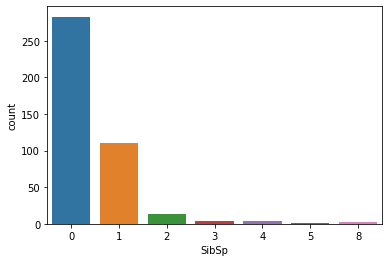

In [13]:
# Siblings of the Passengers
sns.countplot(x="SibSp", data=titanic_data)

# Data Wrangling(Cleaning your Data)

In [14]:
# Check For Values that are Null in our Data
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [15]:
# No of Passengers with NaN Values
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
# Plot a Heatmap to Visually Analyse your NaN Values
sns.heatmap(titanic_data.isnull().yticklabels==False)
sns.heatmap(titanic_data.isnull().yticklabels==False, cmap="viridis")

AttributeError: 'DataFrame' object has no attribute 'yticklabels'

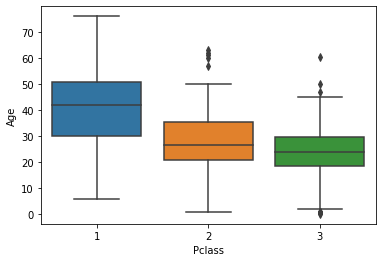

In [17]:
# So here we pick the Age Column VS the Class
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [18]:
# So we apply Logistic Regression in cleaning the Data

# Drop the Cabin Column
titanic_data.drop("Cabin", axis=1, inplace=True)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [19]:
# Drop the NaN Values
titanic_data.dropna(inplace=True)
sns.heatmap(titanic_data.isnull().yticklabels==False, cbar=False)

AttributeError: 'DataFrame' object has no attribute 'yticklabels'

In [20]:
# Check for the Sums
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
# Convert our String Values to Categorical Variables in order to Implement Logistic Regression
pd.get_dummies(titanic_data["Sex"])
sex = pd.get_dummies(titanic_data["Sex"], drop_first=True)
sex.head(5)

,male
0,1
1,0
2,1
3,1
4,0


In [22]:
# Convert our Embark Values to Categorical Variables
embark = pd.get_dummies(titanic_data["Embarked"], drop_first=True)
embark.head(5)

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [23]:
# Convert our Pclass Values to Categorical Variables
Pcl = pd.get_dummies(titanic_data["Pclass"], drop_first=True)
Pcl.head(5)

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [24]:
# Concat all new Rows into our Dataset
titanic_data = pd.concat([titanic_data, sex, embark, Pcl], axis=1)
Pcl.head(5)

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [25]:
# We will drop the other old Columns
titanic_data.drop(["Sex", "Embarked", "PassengerId", "Name", "Ticket", "Pclass"], axis=1, inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,34.5,0,0,7.8292,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,1


# Train Data

In [26]:
# Dependent and Independent Variables
X = titanic_data.drop(["Survived"], axis=1)
y = titanic_data["Survived"]

In [27]:
# Split Data into Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
# So we are going to grab from Linear Regression and fit our dataset
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\benion\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\benion\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Make Predictions
predictions = logmodel.predict(X_test)

# Model Evaluation

In [30]:
# Classification Report
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        57\n           1       1.00      1.00      1.00        43\n\n    accuracy                           1.00       100\n   macro avg       1.00      1.00      1.00       100\nweighted avg       1.00      1.00      1.00       100\n'

In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[57,  0],
       [ 0, 43]], dtype=int64)

In [32]:
# Calculation of Acuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0